# **Predicting Water Quality using Machine Learning: A Comparative Study of Various Classification Algorithms**

Access to safe and clean water is essential for human survival. However, many parts of the world struggle to ensure the quality of available water sources. Harmful contaminants like lead, bacteria, and other substances can make water unsafe for consumption. Microbial and organic contaminants, in particular, can often go undetected by human senses, resulting in delayed recognition of their presence. In some cases, communities only become aware of the problem when people start falling sick. 

Water sources near agricultural areas and industrial plants are particularly vulnerable to contamination. Agricultural practices that involve the use of pesticides and fertilizers can introduce dangerous organic materials into water sources, while exposure to water near industrial areas can also cause health problems. 

To address these issues, we will be using machine learning classification algorithms to predict the safety of water samples containing various levels of contaminants. Our aim is to find the **most accurate algorithm that can classify water quality with high precision, recall, and f1_score**, and help communities make informed decisions about their water sources to protect public health.

To achieve our objective we will follow the following steps


1.   Importing necessary libraries.
2.   Know Your data.
3.   Data preparation.
4.   Data Analysis.
5.   Applying machine learning algorithms to data.
6.   Compare metrics results with each other.

[Get your hands on the dataset in just one step - it's available here!](https://www.kaggle.com/datasets/mssmartypants/water-quality?datasetId=1438979&sortBy=voteCount)

## **Importing Libraries**

In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, StackingClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

## **Loading Dataset**

In [58]:
df = pd.read_csv("waterQuality1.csv")
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


## **Know Your Data**



In [59]:
# shape of dataset
df.shape

(7999, 21)

In [60]:
# columns of dataset
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

[Study more about the water contiminants](https://wqa.org/learn-about-water/common-contaminants/)

In [61]:
# a brief info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [62]:
# a brief analysis of dataset
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [63]:
# no. of instances of every class in target col.
df['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

## **Data Preparation**

### Data Cleaning

In [64]:
# removing rows with incorrect data
df = df[df["ammonia"] != "#NUM!"]
# shape after removal of rows
df.shape

(7996, 21)

In [65]:
# modifying datatypes
df.ammonia = df.ammonia.astype("float")
df["is_safe"] = df["is_safe"].astype(int)

<ipython-input-65-0b9fcfcd1fc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ammonia = df.ammonia.astype("float")
<ipython-input-65-0b9fcfcd1fc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["is_safe"] = df["is_safe"].astype(int)


## **Data Analysis**

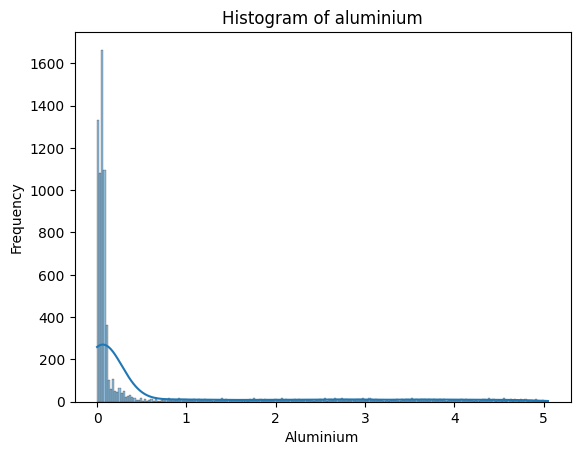

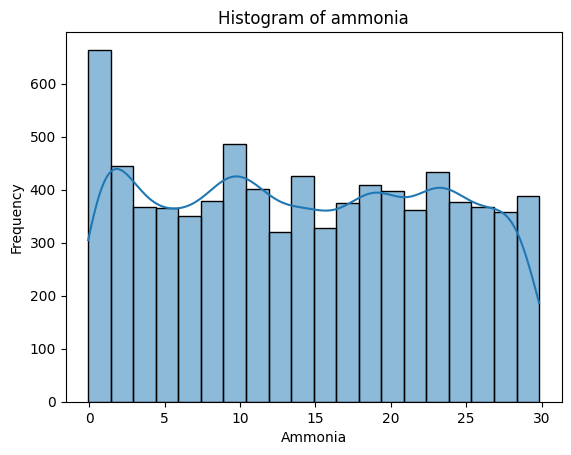

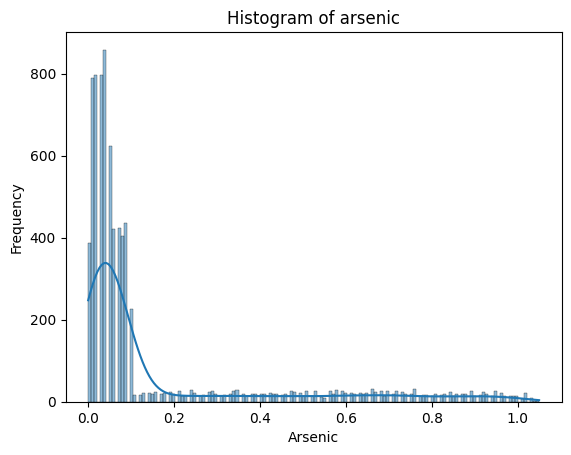

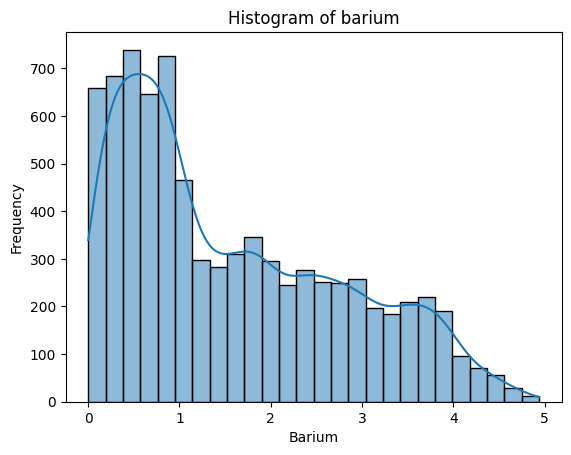

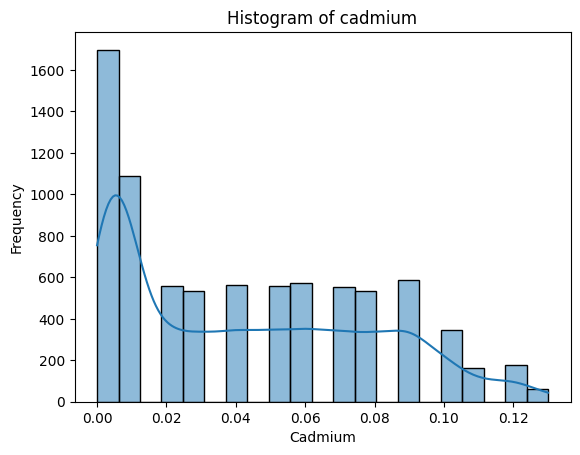

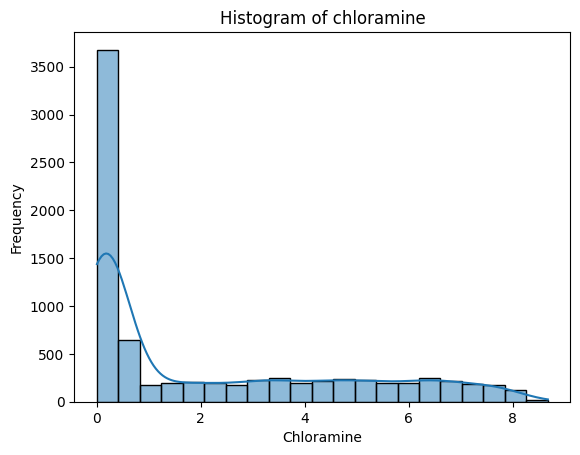

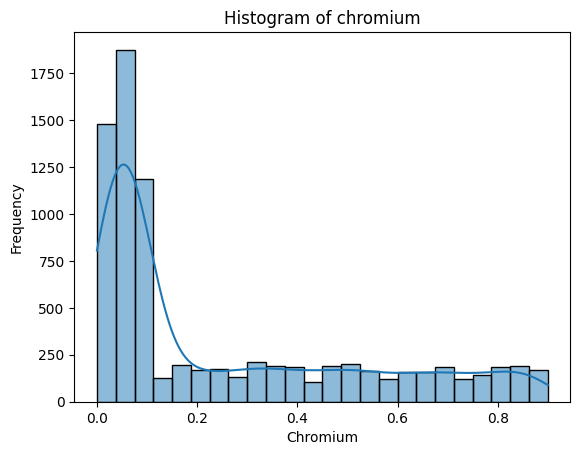

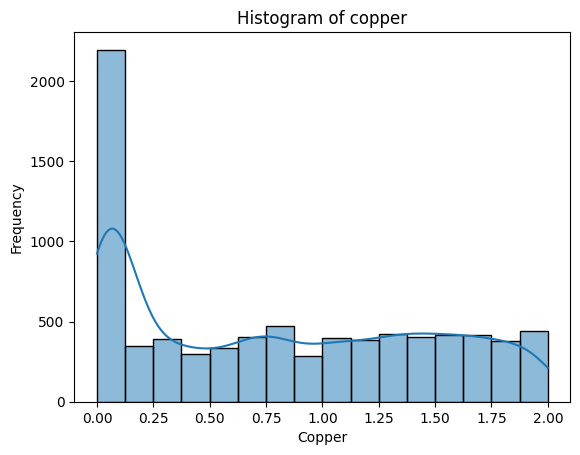

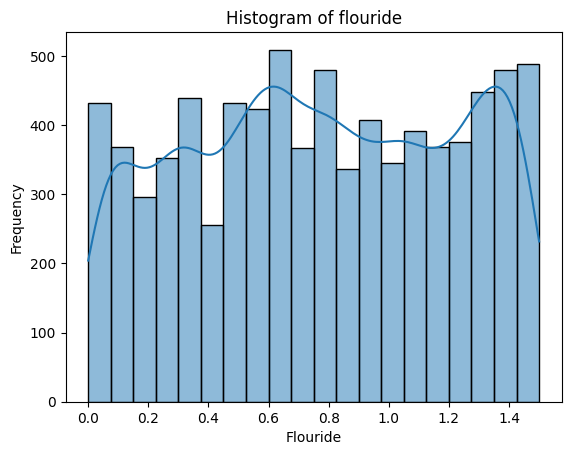

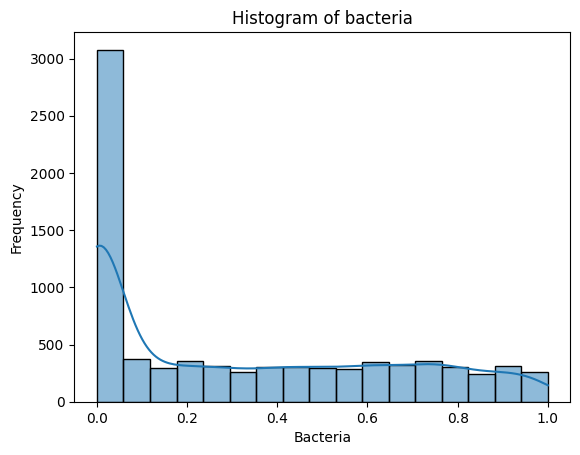

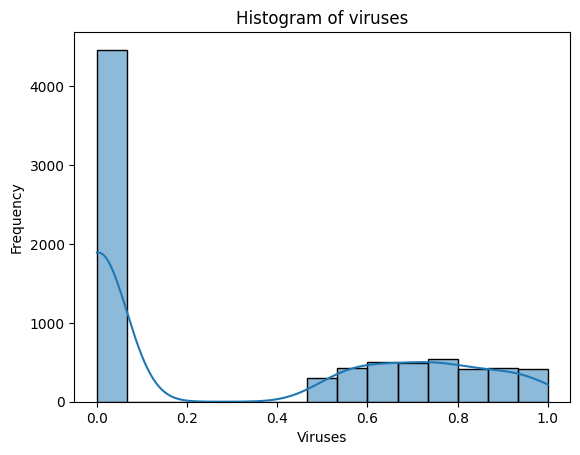

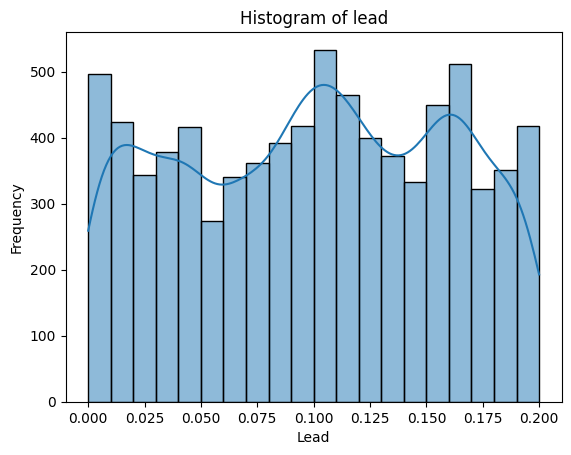

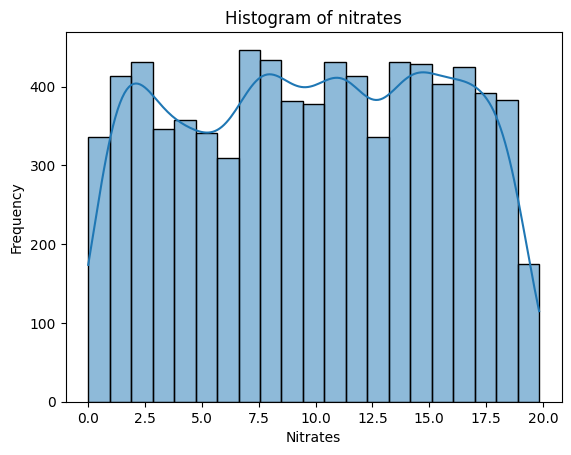

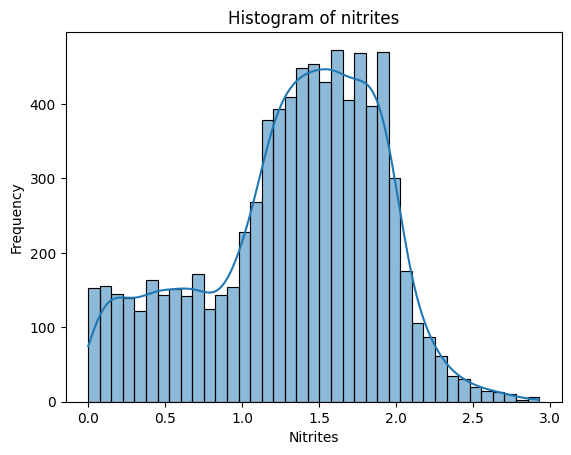

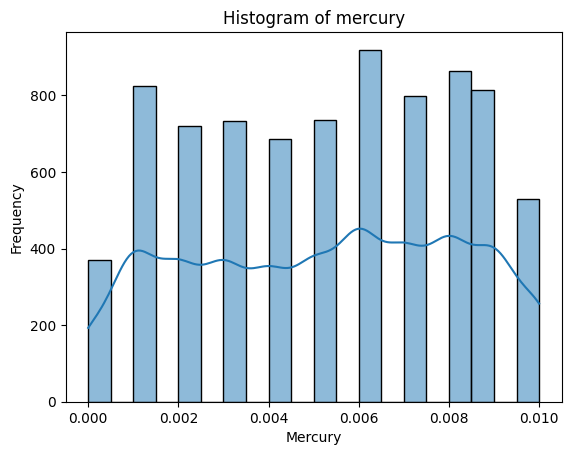

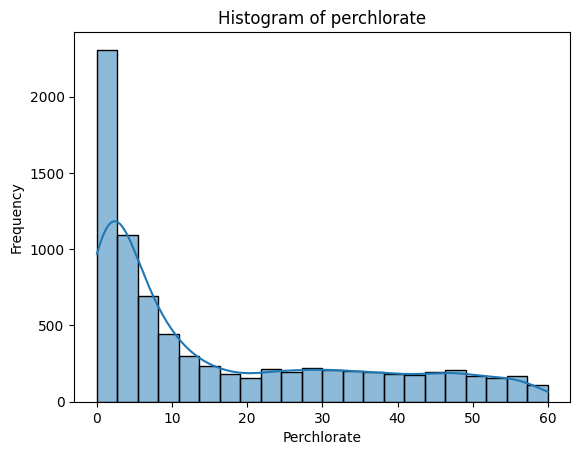

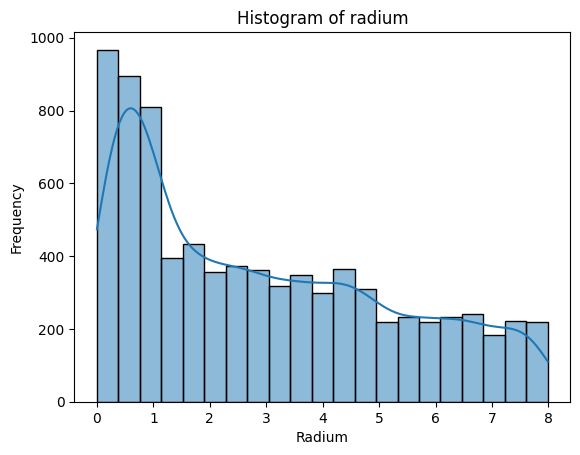

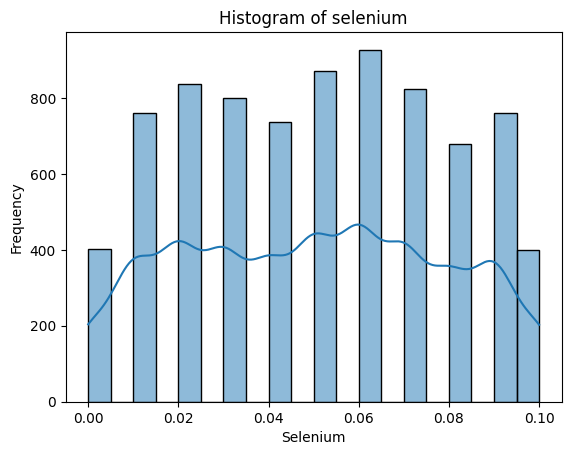

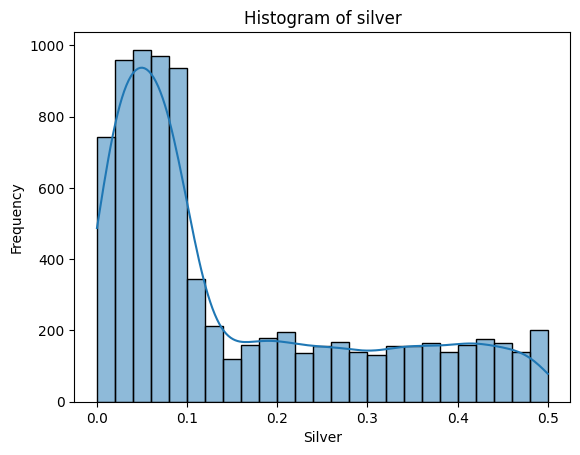

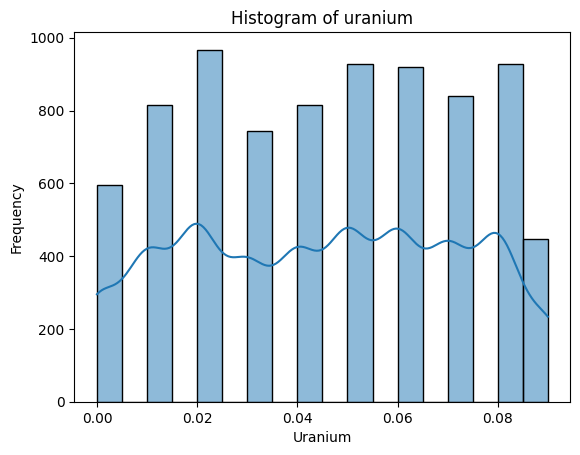

In [66]:
# Distribution of each feature
for col in list(df.columns[:-1]):
  sns.histplot(data=df, x=col, kde=True)
  plt.xlabel("{}".format(col.capitalize()))
  plt.ylabel("Frequency")
  plt.title(f"Histogram of {col}")
  plt.show()

It is clear from the graph that the features aren't normally distributed.

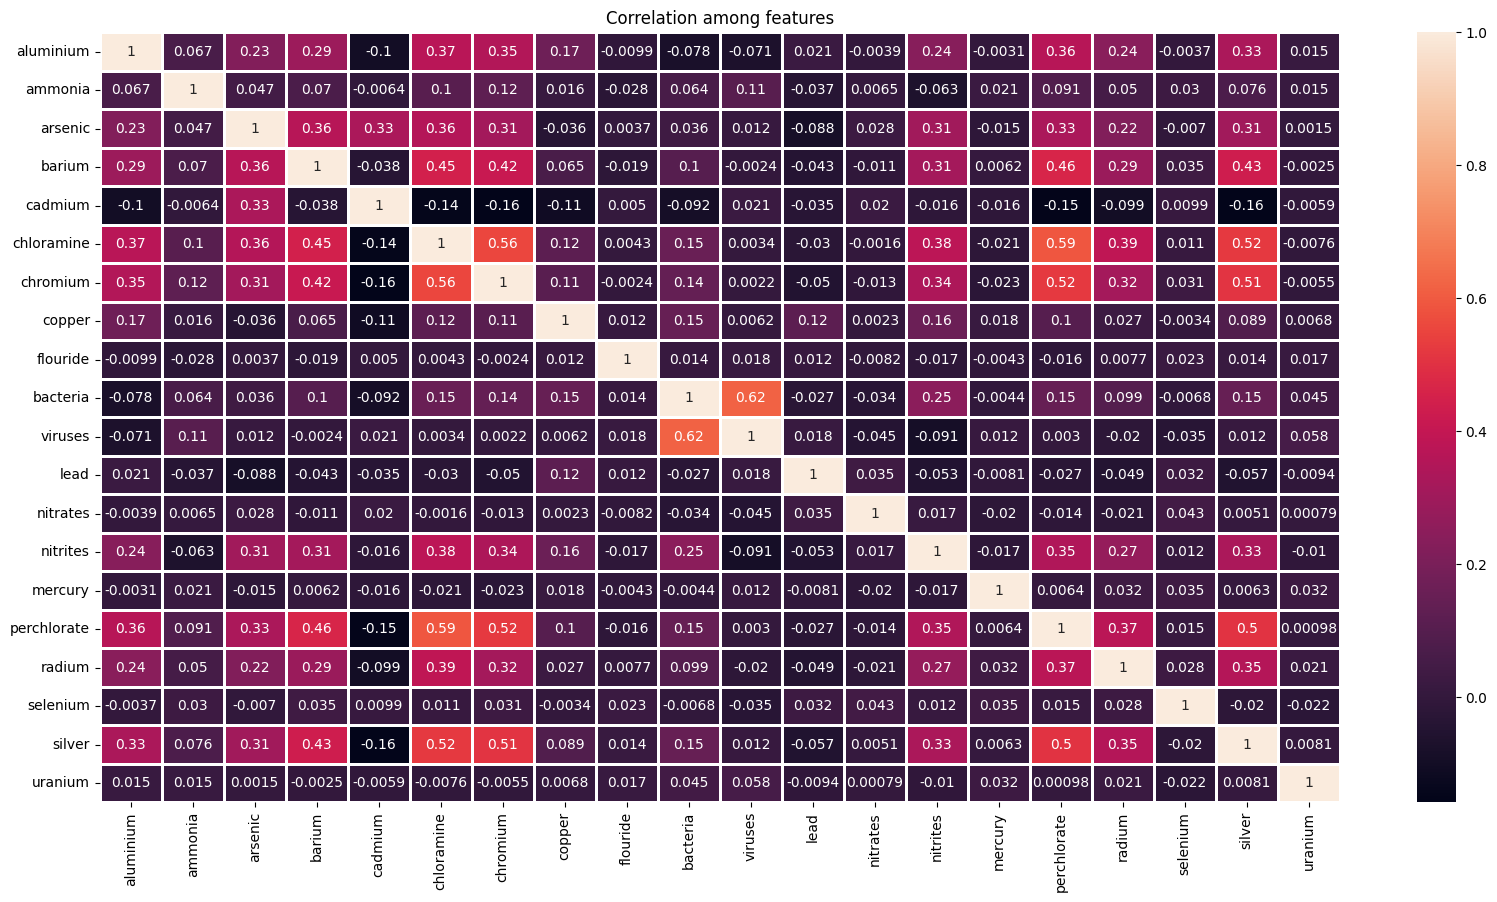

In [67]:
# visualizing correlation among features
plt.figure(figsize=(20, 10))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, linewidths=2)
plt.title("Correlation among features")
plt.show()

Few features are correlated to each other.

### Splitting Data into Features and Target

In [68]:
X = df.iloc[:, :-1]   # features
y = df.iloc[:, -1]    # target

## **A Simple Function to make the process easy**

A pandas DataFrame is created where the first column displays the name of each algorithm and the subsequent columns represent different classification metrics. The purpose of this DataFrame is to enable simple and convenient visualization of classification metric differences among the various algorithms.

In [69]:
metrics = pd.DataFrame(
    {
        "Model" : [],
        "Accuracy" : [],
        "Precision" : [],
        "Recall" : [],
        "F1 Score" : [],
        "Roc curve" : []
    }
)

This function takes in ground truth target values, test samples, and a trained classifier model as inputs. It calculates various classification metrics such as accuracy, precision, recall, F1-score, and roc_auc, and displays the corresponding confusion matrix. The performance metrics are added to a Pandas DataFrame for easy comparison.

In [70]:
def classification_metrics(y_true, X_test, model, metrics):
  """
    Calculates various classification metrics and displays the confusion matrix.
    Also adds the performance metrics to a Pandas DataFrame for comparison.

    Parameters:
    - y_true (array-like of shape (n_samples,)): Ground truth (correct) target values.
    - X_test (array-like of shape (n_samples, n_features)): Test samples.
    - model: A trained classifier model.

    Returns:
    - pandas dataframe: Dataframe with updated classification metrics.
    Prints:
    - Accuracy: The fraction of correctly classified samples.
    - Precision: The proportion of positive predictions that are true positives.
    - Recall: The proportion of true positives that are correctly identified.
    - F1-score: The harmonic mean of precision and recall.
    - roc_auc: The area under the Receiver Operating Characteristic curve.
    - Confusion matrix: A table showing the number of true positives, true negatives,
      false positives, and false negatives.

    Displays:
    - A plot of the confusion matrix.
  """

  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_true, y_pred)
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  roc_auc = roc_auc_score(y_true, y_pred)

  metrics.loc[-1] = [type(model).__name__, accuracy, precision, recall, f1, roc_auc]
  metrics.index += 1
  metrics.sort_index(inplace=True)


  print("""
    Classification Metrics Results
    Accuracy: {}
    Precision: {}
    Recall: {}
    F1: {}
    roc_auc: {}
  """.format(accuracy, precision, recall, f1, roc_auc))
  ConfusionMatrixDisplay(cm).plot()
  plt.show()
  return metrics


## **Applying Machine Learning Algorithms**

### Splitting Data into Training and Testing

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

### Decision Tree Classifier


    Classification Metrics Results
    Accuracy: 0.955
    Precision: 0.8224852071005917
    Recall: 0.7679558011049724
    F1: 0.7942857142857144
    roc_auc: 0.8734070760281732
  


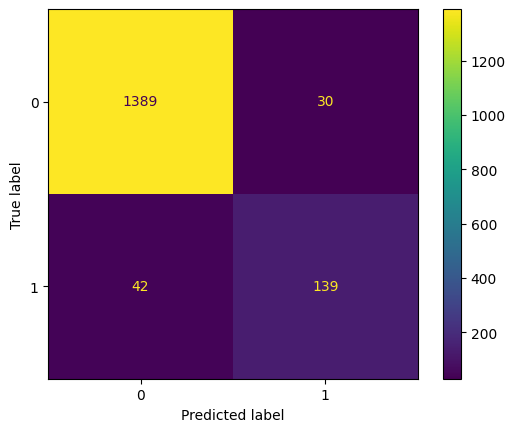

In [72]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
metrics = classification_metrics(y_test, X_test, dt, metrics)

### KNeighborsClassifier


    Classification Metrics Results
    Accuracy: 0.8875
    Precision: 0.5217391304347826
    Recall: 0.06629834254143646
    F1: 0.11764705882352942
    roc_auc: 0.5292732022784702
  


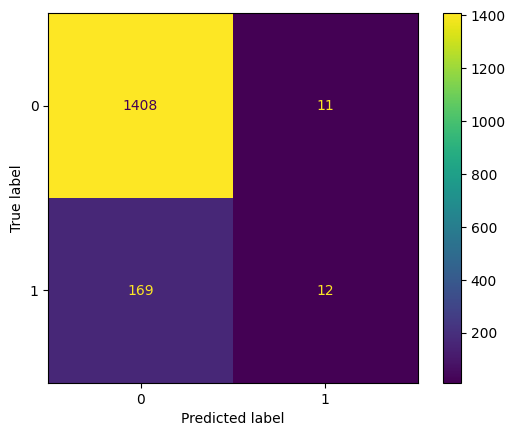

In [73]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
metrics = classification_metrics(y_test, X_test, knn, metrics)

### Gaussian Naive Bayes


    Classification Metrics Results
    Accuracy: 0.83875
    Precision: 0.3712374581939799
    Recall: 0.6132596685082873
    F1: 0.46249999999999997
    roc_auc: 0.7403860005684495
  


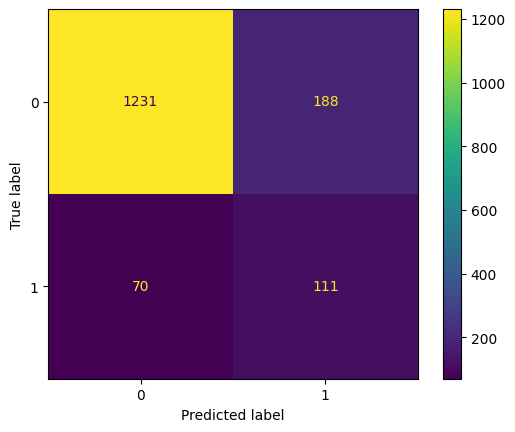

In [74]:
GNaive = GaussianNB()
GNaive.fit(X_train, y_train)
metrics = classification_metrics(y_test, X_test, GNaive, metrics)

### Voting Ensemble


    Classification Metrics Results
    Accuracy: 0.94
    Precision: 0.8571428571428571
    Recall: 0.56353591160221
    F1: 0.6799999999999999
    roc_auc: 0.7757778219039945
  


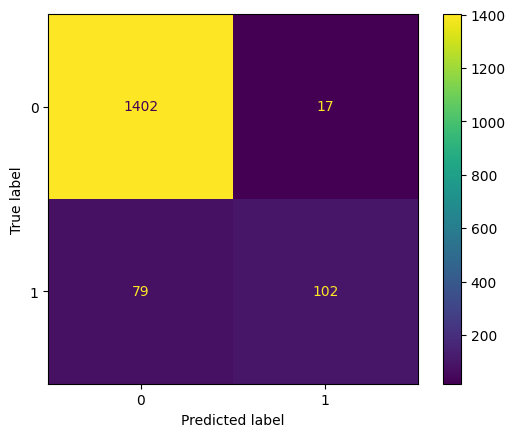

In [75]:
estimators = [
    ("Decision Tree Classifier", dt),
    ("K Nearest Neighbors Classifier", knn),
    ("Gussian Naive Bayes", GNaive)
]
voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)
metrics = classification_metrics(y_test, X_test, voting, metrics)

### Random Forest Classifier


    Classification Metrics Results
    Accuracy: 0.958125
    Precision: 0.9191176470588235
    Recall: 0.6906077348066298
    F1: 0.7886435331230284
    roc_auc: 0.8414278984110668
  


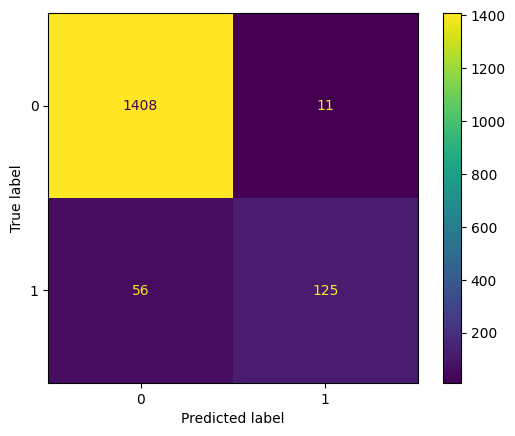

In [76]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
metrics = classification_metrics(y_test, X_test, random_forest, metrics)

### Stacking Ensemble


    Classification Metrics Results
    Accuracy: 0.93125
    Precision: 0.7052023121387283
    Recall: 0.6740331491712708
    F1: 0.6892655367231638
    roc_auc: 0.8190461728943035
  


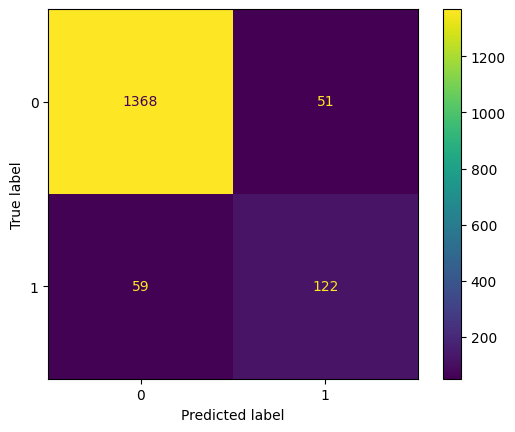

In [77]:
stacking = StackingClassifier(estimators = estimators, final_estimator=random_forest, n_jobs = -1)
stacking.fit(X_train, y_train)
metrics = classification_metrics(y_test, X_test, stacking, metrics)

## **Visualizing Classification Metrics**

In [78]:
metrics.set_index('Model', inplace=True)
metrics

,Accuracy,Precision,Recall,F1 Score,Roc curve
Model,,,,,
StackingClassifier,0.931250,0.705202,0.674033,0.689266,0.819046
RandomForestClassifier,0.958125,0.919118,0.690608,0.788644,0.841428
VotingClassifier,0.940000,0.857143,0.563536,0.680000,0.775778
GaussianNB,0.838750,0.371237,0.613260,0.462500,0.740386
KNeighborsClassifier,0.887500,0.521739,0.066298,0.117647,0.529273
DecisionTreeClassifier,0.955000,0.822485,0.767956,0.794286,0.873407


### First Way to Visualize

[]

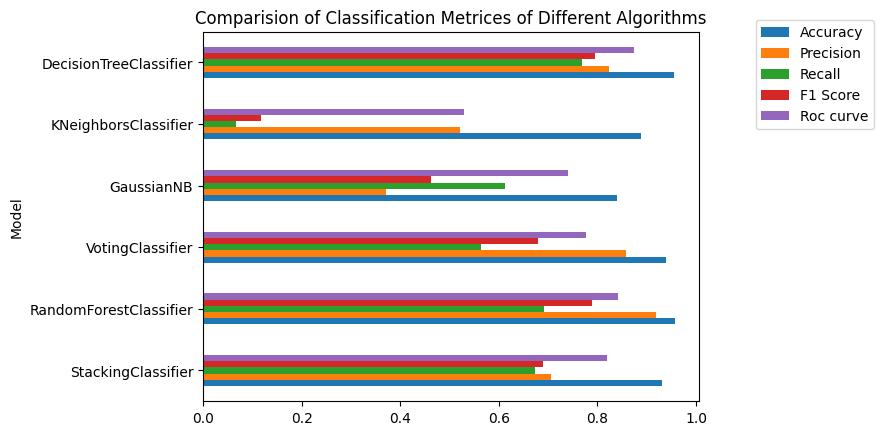

In [79]:
metrics.plot(kind='barh', title = "Comparision of Classification Metrices of Different Algorithms")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.plot()

### Second Way to Visualize

[]

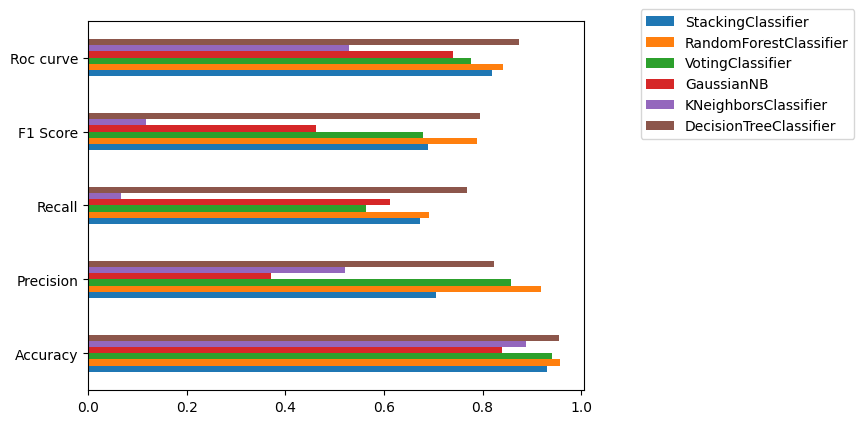

In [83]:
metrics.T.plot(kind="barh")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.plot()

## **Conclusion**



1.   Random Forest Classifier performs well in terms of accuracy.
2.   Random Forest Classifier performs well in terms of precision.
3.   Decision Tree Classifier performs well in terms of recall.
4.   Decision Tree Classifier performs well in terms of f1_score.

